Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os
import json
import tensorflow as tf
import random
from vae.vae import reset_graph, ConvVAE

In [2]:
import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

DATA_DIR = "record"
model_path_name = "tf_vae"
# NOTE: make sure you copy the vae model you want to test from tf_vae/vae.json to tf_models/vae.json

z_size=64

In [4]:
filelist = os.listdir(DATA_DIR)

In [5]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae.json'))

W0708 13:58:11.929633 140359459800896 deprecation_wrapper.py:119] From /media/shahd/dcffe8cc-c40a-417c-b4ce-1a35d2c675e7/dreamingcar/dreamduck/dreamduck/envs/vae/vae.py:28: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W0708 13:58:11.946843 140359459800896 deprecation_wrapper.py:119] From /media/shahd/dcffe8cc-c40a-417c-b4ce-1a35d2c675e7/dreamingcar/dreamduck/dreamduck/envs/vae/vae.py:31: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

W0708 13:58:11.948517 140359459800896 deprecation_wrapper.py:119] From /media/shahd/dcffe8cc-c40a-417c-b4ce-1a35d2c675e7/dreamingcar/dreamduck/dreamduck/envs/vae/vae.py:42: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 13:58:11.950204 140359459800896 deprecation.py:323] From /media/shahd/dcffe8cc-c40a-417c-b4ce-1a35d2c675e7/dreamingcar/dreamduck/dreamduck/envs/vae/vae.py:46: conv2d (from tensorflow.python.layers.convolutional) 

In [58]:
obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))["obs"]
obs = obs.astype(np.float32)/255.0

In [59]:
frame = random.choice(obs).reshape(1, 64, 64, 3)

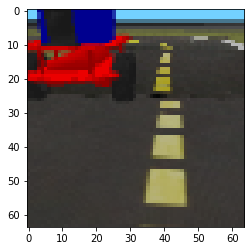

In [60]:
# show recorded frame that will be fed into the input of VAE
plt.imshow(frame[0])
plt.show()

In [61]:
batch_z = vae.encode(frame)
print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)

[-1.6498 -1.5384  0.4832 -0.6902 -0.9501 -0.0188  0.304  -0.9537 -0.4505 -1.1372 -0.2582 -0.8358
  0.7297 -0.0485  0.8272  0.1407  1.1174 -0.797   0.8195  0.3469  0.7529  1.4124 -1.3456 -1.7039
  1.4754 -0.0766  0.2927  0.8363 -0.3959 -0.6604 -0.2351  0.2472 -2.2209  0.3047  1.2968 -1.2304
 -0.5557  1.3599  0.2391 -1.3615 -3.4427  1.6991 -0.2212  0.3852  1.055   0.0553 -0.2341  0.5696
  0.1678 -1.3719  0.1329 -1.1355  0.0039 -0.7003  0.4114  0.3777  1.4188  0.3765  0.0638 -1.6078
  0.142  -0.8469  0.2653 -0.379 ]


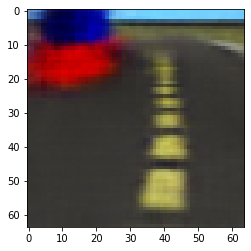

In [62]:
# show reconstruction
plt.imshow(reconstruct[0])
plt.show()